In [ ]:
import pandas as pd
import warnings
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

warnings.filterwarnings("ignore")

!pip install kaggle

cred = {"username":"akmalariq9","key":"226c6c52a4e488b79657373a7aeedfd3"}

!mkdir ~/.kaggle/
!touch ~/.kaggle/kaggle.json

import json
api_token = cred

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d syedanwarafridi/vehicle-sales-data

!unzip vehicle-sales-data.zip

mkdir: cannot create directory ‘/root/.kaggle/’: File exists
vehicle-sales-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  vehicle-sales-data.zip
replace car_prices.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: car_prices.csv          


In [ ]:
df = pd.read_csv('/content/car_prices.csv')
df_numeric = df.drop(['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior', 'seller', 'vin', 'saledate'], axis=1)
df_numeric.head()
# df.head()


,year,condition,odometer,mmr,sellingprice
0,2015,5.0,16639.0,20500.0,21500.0
1,2015,5.0,9393.0,20800.0,21500.0
2,2014,45.0,1331.0,31900.0,30000.0
3,2015,41.0,14282.0,27500.0,27750.0
4,2014,43.0,2641.0,66000.0,67000.0


In [ ]:
df_numeric.isna().sum()

year                0
condition       11820
odometer           94
mmr                38
sellingprice       12
dtype: int64

In [ ]:
df_clean = df_numeric.dropna()

df_clean.isna().sum()

year            0
condition       0
odometer        0
mmr             0
sellingprice    0
dtype: int64

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546976 entries, 0 to 558836
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          546976 non-null  int64  
 1   condition     546976 non-null  float64
 2   odometer      546976 non-null  float64
 3   mmr           546976 non-null  float64
 4   sellingprice  546976 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 25.0 MB


In [ ]:
from sklearn.preprocessing import StandardScaler
X = df_clean.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.91550987, -0.95891064,  0.68058848,  0.79356955],
       [-1.91550987, -1.09616234,  0.7115981 ,  0.79356955],
       [ 1.06895833, -1.24887049,  1.85895412,  1.66555947],
       ...,
       [ 1.29279344, -0.3163696 ,  1.64188676,  2.07590767],
       [ 0.54667639, -0.95855074,  0.12241528, -0.27333577],
       [ 0.24822957, -0.98980458,  1.62121368,  1.32702221]])

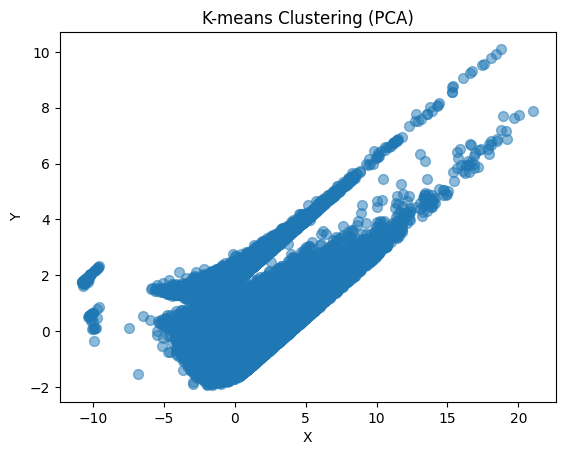

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(Clus_dataSet)

# Plotting the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1],s=50, alpha=0.5)

plt.title('K-means Clustering (PCA)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

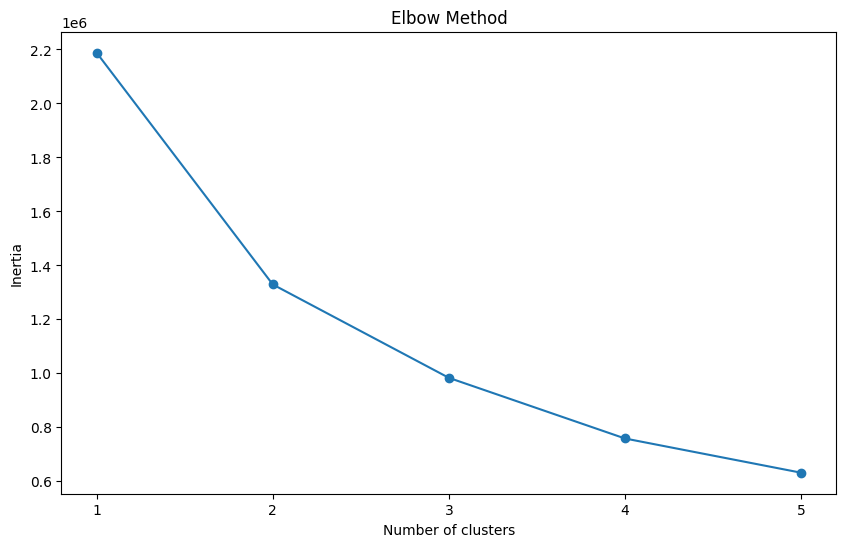

In [ ]:
inertia = []

clusters_range = range(1, 6)

for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(Clus_dataSet)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(clusters_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(clusters_range)
plt.show()

In [ ]:
clusterNum = 3
k_means = KMeans(init="k-means++", n_clusters=clusterNum, n_init=12)
k_means.fit(Clus_dataSet)
labels = k_means.labels_
print(labels)

[1 1 2 ... 2 1 2]


In [ ]:
df_clean["Clus_dataSet"] = labels
df_clean

,year,condition,odometer,mmr,sellingprice,cluster,Clus_dataSet
0,2015,5.0,16639.0,20500.0,21500.0,1,1
1,2015,5.0,9393.0,20800.0,21500.0,1,1
2,2014,45.0,1331.0,31900.0,30000.0,2,2
3,2015,41.0,14282.0,27500.0,27750.0,2,2
4,2014,43.0,2641.0,66000.0,67000.0,2,2
...,...,...,...,...,...,...,...
558832,2015,45.0,18255.0,35300.0,33000.0,2,2
558833,2012,5.0,54393.0,30200.0,30800.0,2,2
558834,2012,48.0,50561.0,29800.0,34000.0,2,2
558835,2015,38.0,16658.0,15100.0,11100.0,1,1


In [ ]:
df_clean.groupby('Clus_dataSet').mean()

,year,condition,odometer,mmr,sellingprice,cluster
Clus_dataSet,,,,,,
0,2005.811112,21.548428,127743.293332,5251.122632,4918.141005,0.0
1,2011.850329,34.059686,43703.138344,14024.276080,13929.825304,1.0
2,2012.707789,36.884688,29776.514669,30105.733770,30113.314325,2.0


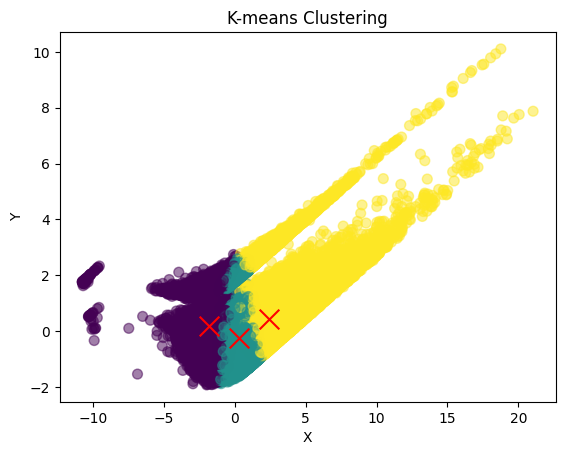

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(Clus_dataSet)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels,
            cmap='viridis', s=50, alpha=0.5)

centroids_pca = pca.transform(k_means.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            c='red', marker='x', s=200)

plt.title('K-means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

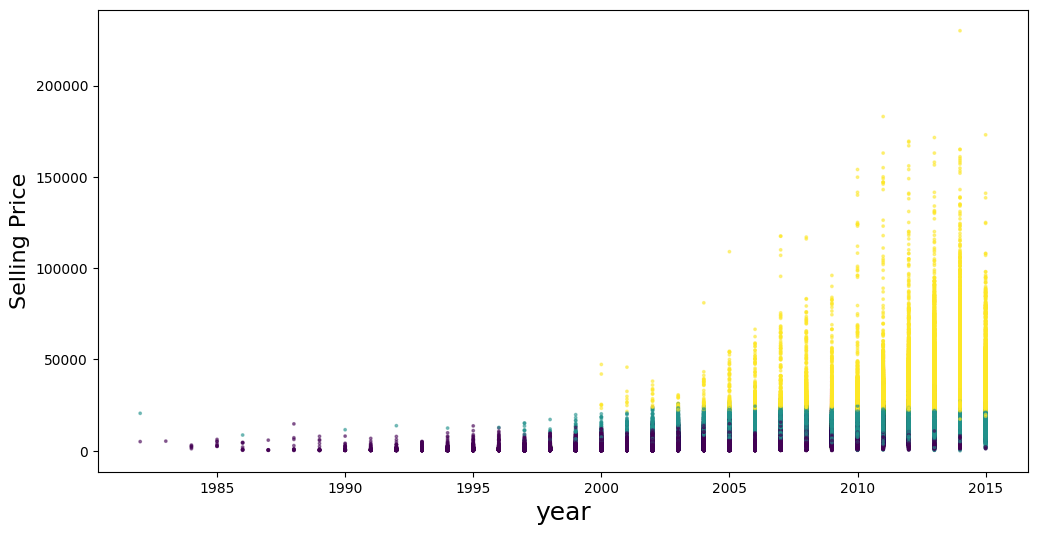

In [ ]:
area = np.pi
plt.figure(figsize=(12,6))
plt.scatter(df_clean.loc[:, ["year"]], df_clean.loc[:, ["sellingprice"]], s=area, c=labels.astype(np.float64), alpha=0.5)
plt.xlabel('year', fontsize=18)
plt.ylabel('Selling Price', fontsize=16)

plt.show()